<a href="https://colab.research.google.com/github/Divyadmenon098/Breast_Cancer_Prediction-ML-/blob/main/Brest_Cancer_prediction(Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load dataset
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Brest_cancer_prediction.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
#Dependencies imported
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df.shape

(569, 33)

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.drop(axis=1, columns="id", inplace=True)

In [ ]:
df.drop(axis=1, columns="Unnamed: 32", inplace=True)

In [ ]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
df.drop(columns=["radius_mean","perimeter_mean","area_mean","radius_se","perimeter_se","area_se","symmetry_se","texture_worst","smoothness_worst"],axis=1,inplace=True)

In [ ]:

lable_encoder=LabelEncoder()
df["diagnosis"]=lable_encoder.fit_transform(df["diagnosis"])
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
df

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,...,concave points_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,0.006399,...,0.01587,0.006193,25.380,184.60,2019.0,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,0.005225,...,0.01340,0.003532,24.990,158.80,1956.0,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,0.006150,...,0.02058,0.004571,23.570,152.50,1709.0,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,0.009110,...,0.01867,0.009208,14.910,98.87,567.7,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,0.011490,...,0.01885,0.005115,22.540,152.20,1575.0,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,0.010300,...,0.02454,0.004239,25.450,166.10,2027.0,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,0.005769,...,0.01678,0.002498,23.690,155.00,1731.0,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,0.005903,...,0.01557,0.003892,18.980,126.70,1124.0,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,0.006522,...,0.01664,0.006185,25.740,184.60,1821.0,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df["diagnosis"].value_counts()     # 1 - malignant, 0- Benign

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
df.dtypes

diagnosis                    int64
texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
texture_se                 float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
fractal_dimension_se       float64
radius_worst               float64
perimeter_worst            float64
area_worst                 float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

In [ ]:
X=df.iloc[:,1:]
X

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,...,concave points_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,0.006399,0.04904,...,0.01587,0.006193,25.380,184.60,2019.0,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,0.005225,0.01308,...,0.01340,0.003532,24.990,158.80,1956.0,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,0.006150,0.04006,...,0.02058,0.004571,23.570,152.50,1709.0,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,0.009110,0.07458,...,0.01867,0.009208,14.910,98.87,567.7,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,0.011490,0.02461,...,0.01885,0.005115,22.540,152.20,1575.0,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,0.010300,0.02891,...,0.02454,0.004239,25.450,166.10,2027.0,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,0.005769,0.02423,...,0.01678,0.002498,23.690,155.00,1731.0,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,0.005903,0.03731,...,0.01557,0.003892,18.980,126.70,1124.0,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,0.006522,0.06158,...,0.01664,0.006185,25.740,184.60,1821.0,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y=df.iloc[:,0]
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
mms=MinMaxScaler()
X=mms.fit_transform(X)
X

array([[0.0226581 , 0.59375282, 0.7920373 , ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.27257355, 0.28987993, 0.18176799, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.3902604 , 0.51430893, 0.4310165 , ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.62123774, 0.28816467, 0.25434022, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.66351031, 0.58833619, 0.79019692, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.50152181, 0.        , 0.07435127, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
#split X and y for train,test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(398, 21)

In [ ]:
y_test.shape

(171,)

Axes(0.125,0.11;0.775x0.77)


0    357
1    212
Name: diagnosis, dtype: int64

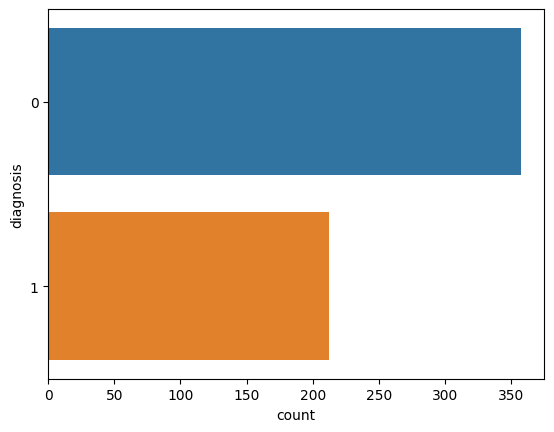

In [ ]:
print(sns.countplot(data=df,y='diagnosis'))
df['diagnosis'].value_counts()

<Axes: xlabel='compactness_mean', ylabel='count'>

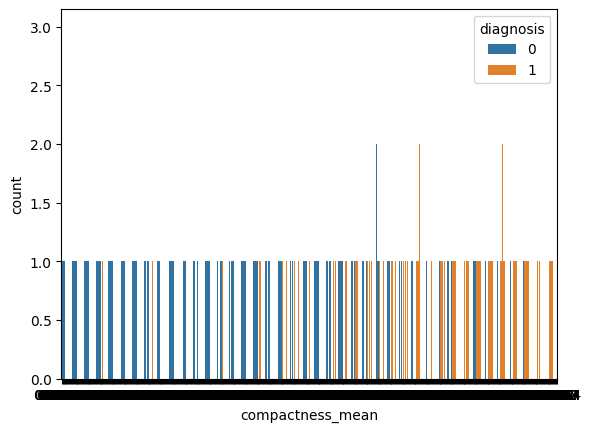

In [ ]:
sns.countplot(x='compactness_mean',data=df,hue='diagnosis')

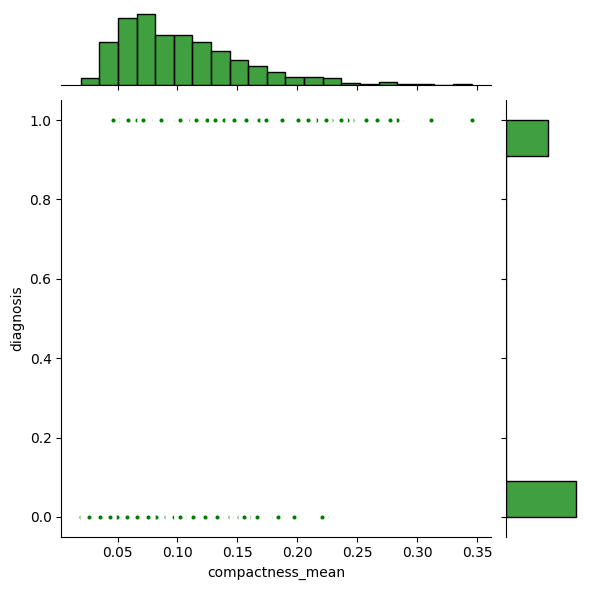

In [ ]:
sns.jointplot(x='compactness_mean',y='diagnosis',color='g',data=df,linewidth=3)

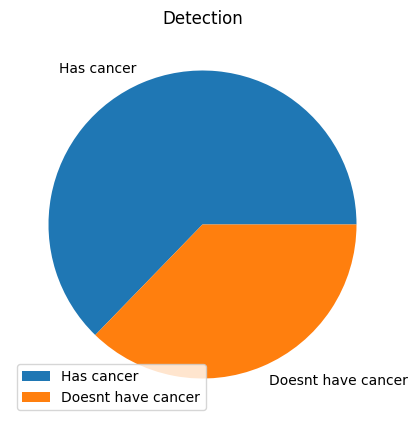

In [ ]:
import matplotlib.pyplot as plt
y=df['diagnosis'].value_counts()
plt.figure(figsize=(5,5))
labels=["Has cancer","Doesnt have cancer"]
plt.pie(y,labels=labels)
plt.legend(loc='lower left')
plt.title('Detection')
plt.show()

************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

************************* SVC() *************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

************************* GaussianNB() *************************
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.89      0.90      

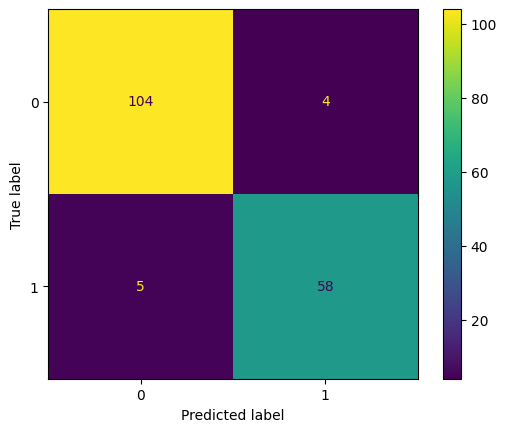

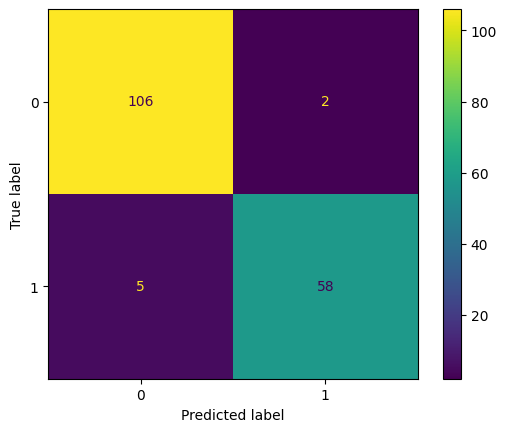

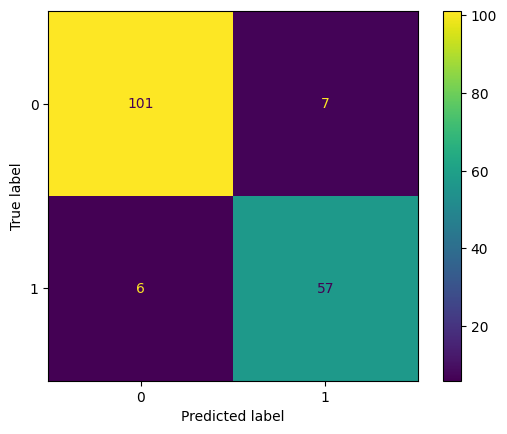

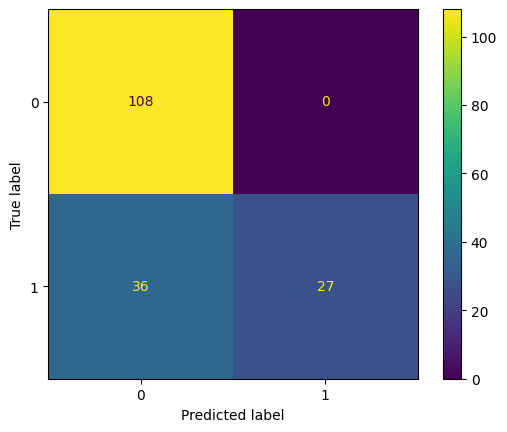

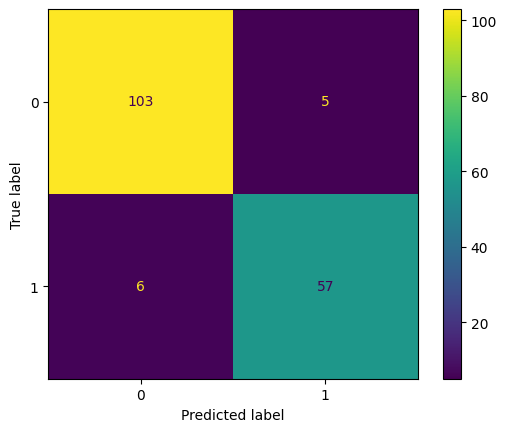

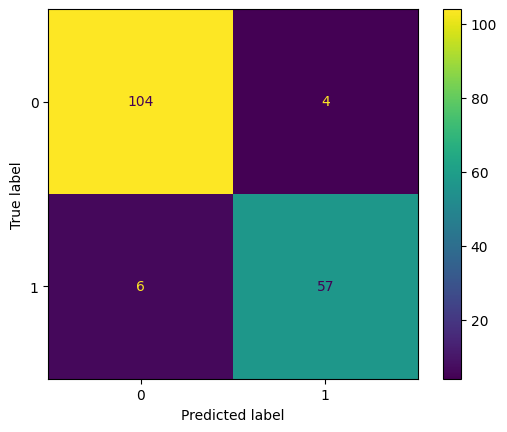

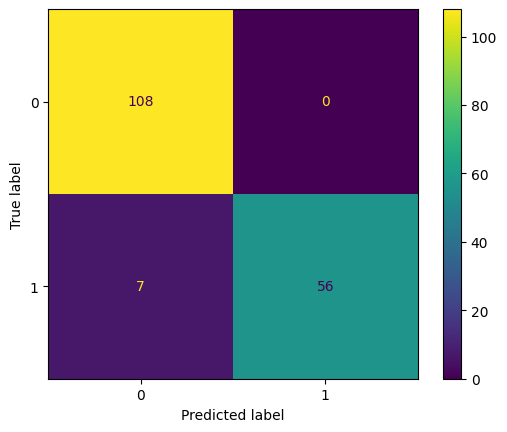

In [ ]:
kn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
mn=MultinomialNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier()
models=[kn,sv,nb,mn,dt,rf,ab]
for model in models:
  print('*'*25,model,'*'*25)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
y_train.value_counts()

0    249
1    149
Name: diagnosis, dtype: int64

In [ ]:
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [ ]:
y_train_sm.value_counts()

0    249
1    249
Name: diagnosis, dtype: int64

************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

************************* SVC() *************************
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

************************* GaussianNB() *************************
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       108
           1       0.88      0.90      

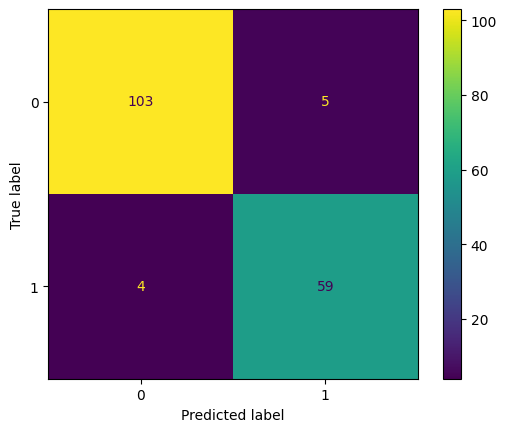

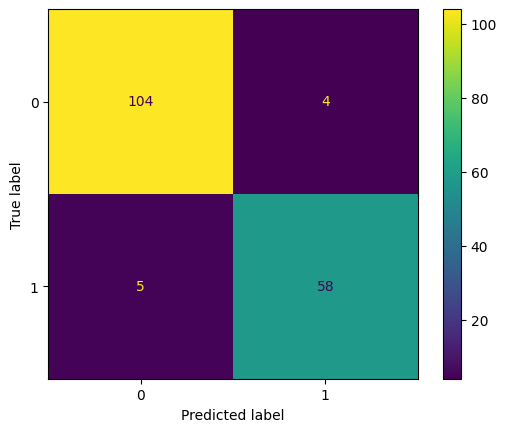

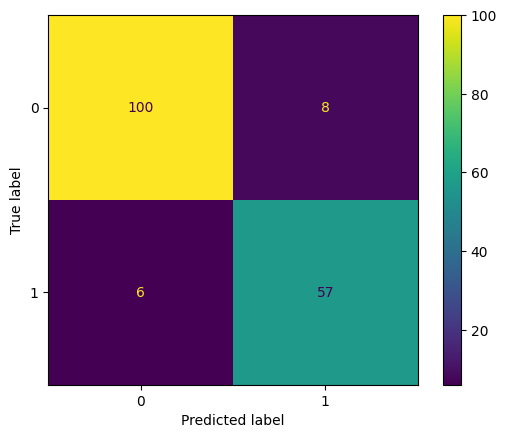

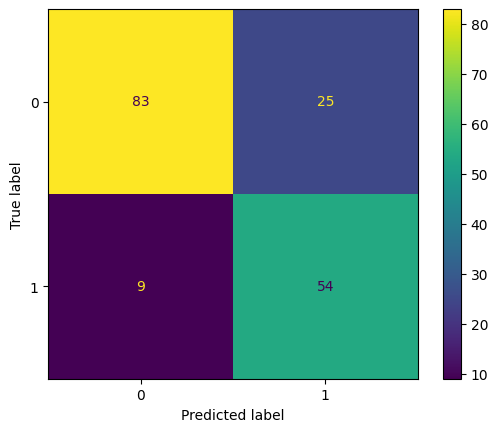

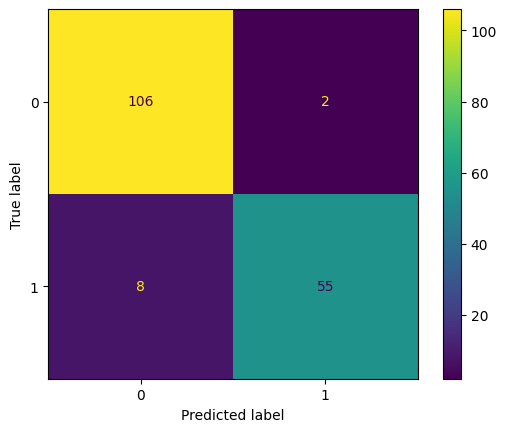

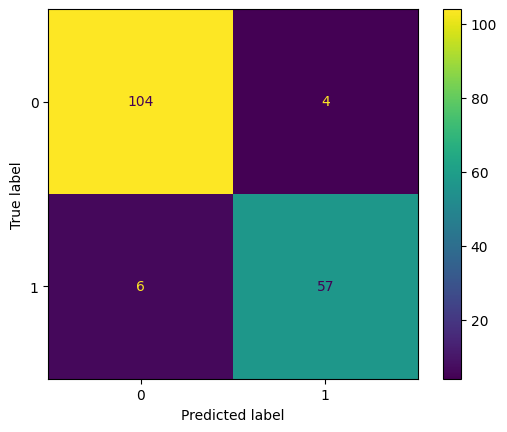

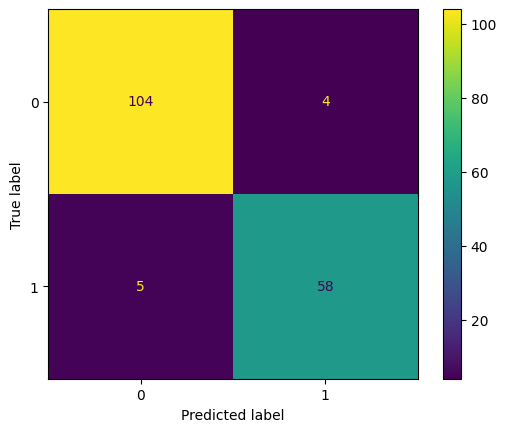

In [ ]:
knsm=KNeighborsClassifier()
svsm=SVC()
nbsm=GaussianNB()
mnsm=MultinomialNB()
dtsm=DecisionTreeClassifier()
rfsm=RandomForestClassifier(random_state=1)
absm=AdaBoostClassifier()
models1=[knsm,svsm,nbsm,mnsm,dtsm,rfsm,absm]
for model in models1:
  print('*'*25,model,'*'*25)
  model.fit(X_train_sm,y_train_sm)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
us=RandomUnderSampler(random_state=1)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)

In [ ]:
y_train_us.value_counts()

0    149
1    149
Name: diagnosis, dtype: int64

************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       108
           1       0.83      0.92      0.87        63

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.90       171
weighted avg       0.91      0.90      0.90       171

************************* SVC() *************************
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

************************* GaussianNB() *************************
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       108
           1       0.88      0.90      

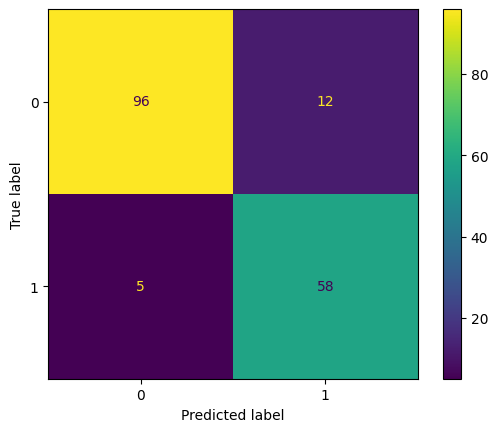

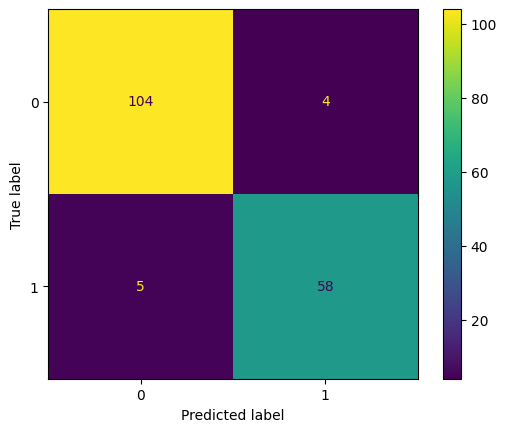

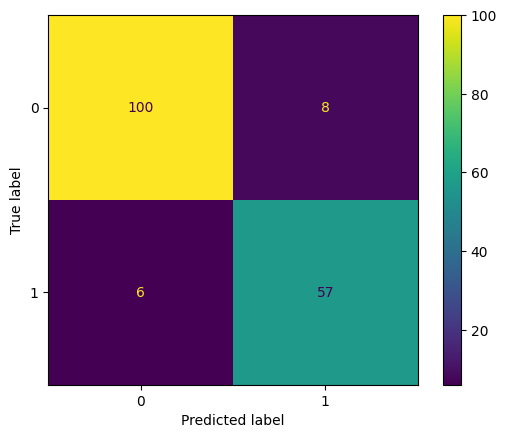

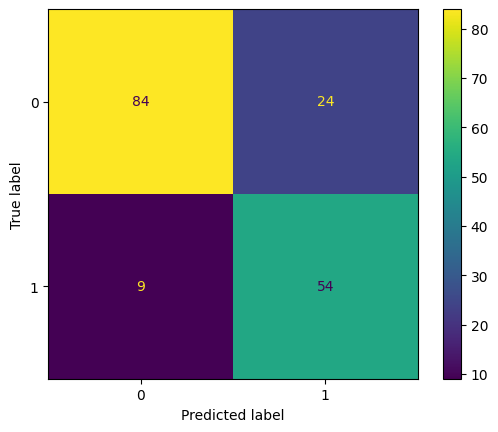

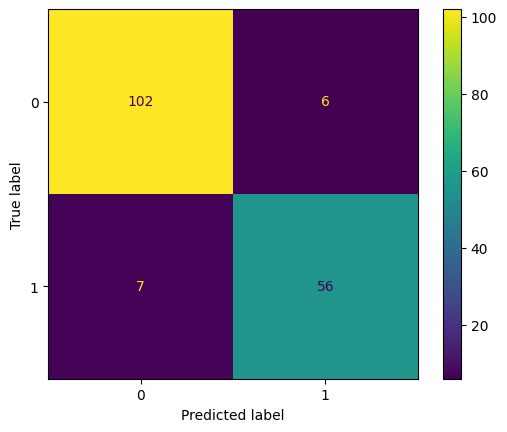

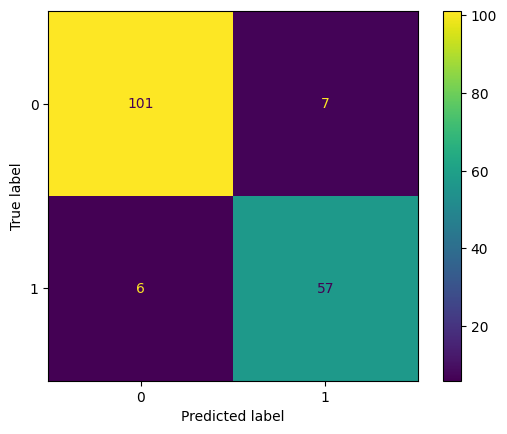

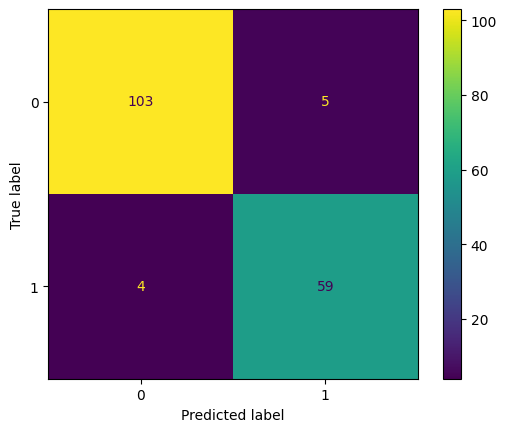

In [ ]:
knus=KNeighborsClassifier()
svus=SVC()
nbus=GaussianNB()
mnus=MultinomialNB()
dtus=DecisionTreeClassifier()
rfus=RandomForestClassifier(random_state=1)
abus=AdaBoostClassifier()
models2=[knus,svus,nbus,mnus,dtus,rfus,abus]
for model in models2:
  print('*'*25,model,'*'*25)
  model.fit(X_train_us,y_train_us)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
pca=PCA()
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

************************* SVC() *************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

************************* GaussianNB() *************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       108
           1       0.88      0.79      

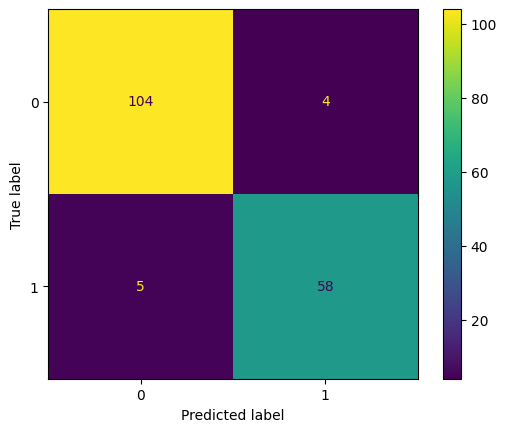

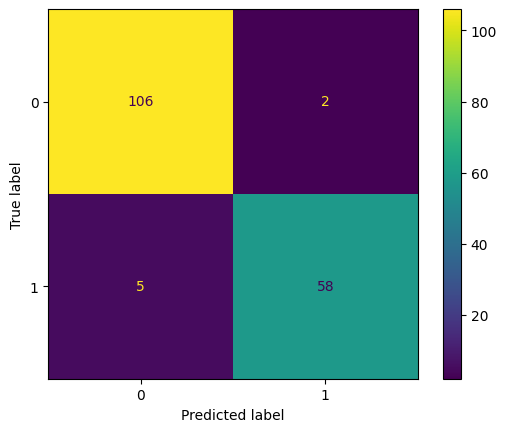

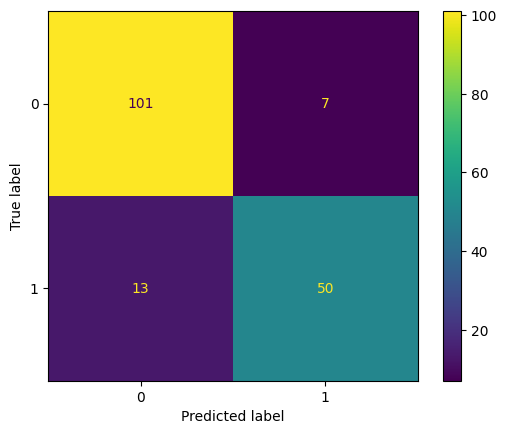

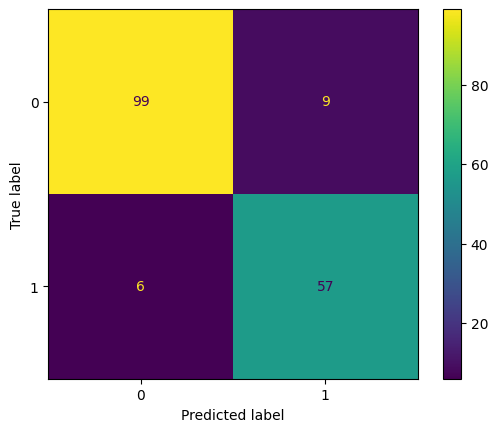

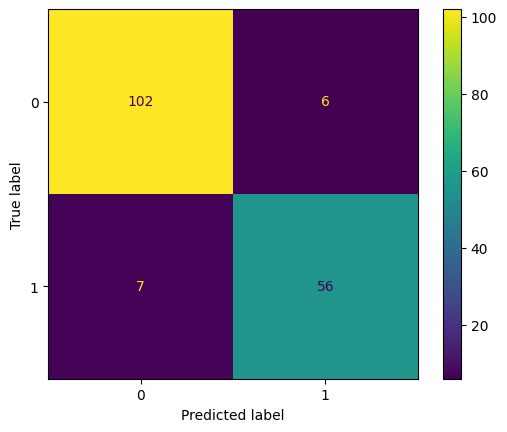

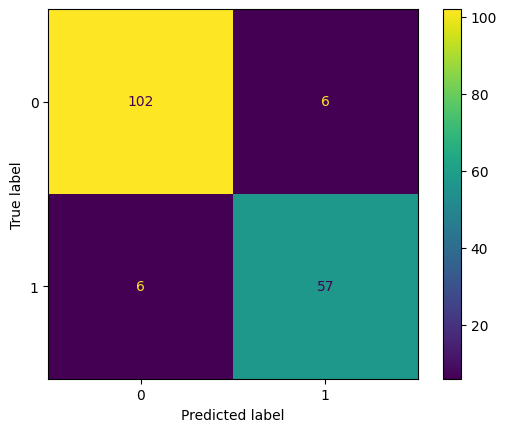

In [ ]:
knpca=KNeighborsClassifier()
svpca=SVC()
nbpca=GaussianNB()
dtpca=DecisionTreeClassifier()
rfpca=RandomForestClassifier(random_state=1)
abpca=AdaBoostClassifier()
models3=[knpca,svpca,nbpca,dtpca,rfpca,abpca]
for model in models3:
  print('*'*25,model,'*'*25)
  model.fit(X_train_pca,y_train)
  y_pred=model.predict(X_test_pca)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))